In [1]:
# change frontier words from Martin to dictonary for vectorizer
with open (r'C:\Users\Blamo\Documents\cs506\frontier words.txt','r') as f:
#    frontier = f.read().replace("'","").replace("\n","").replace(" ","").split(',')
    frontier = f.read().replace("'","").replace("\n","").split(',')
    frontier1 = []
    for i in range(0,len(frontier)):
        frontier1.append(frontier[i].lstrip().rstrip())
        f_dic = {frontier[i].lstrip().rstrip() : i for i in range(len(frontier))}

#    print(frontier1)

#    print(len(frontier1))
#    print(f_dic)

In [2]:
#open all files needed and store it 
from sklearn.feature_extraction.text import CountVectorizer
import os
import glob
import numpy as np
import operator
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer

#i/p document file path and frontier word list, 
#o/p 1. a list of word number in each document
#    2. an array contains each frontier word importance rank
#    3. a corpus for next step
#    4. the weight parameter matrix
def operations(path,f_list): 
    corpus = [] #list of all document as strings
#    tfidf = {}
#    listdic = []
#    wordlist = []#a list of all different words in each docuement
#    tlist = []
    
    for filename in glob.glob(os.path.join(path, 'Chapter*.txt')):
        with open (filename,'r') as C:
            corpus.append(C.read()) #get a list of strings
#        for i in corpus:#for each chapter separately
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    Xarray = X.toarray()#word frequency array for all words in the document词频矩阵
    
    num = [] #list of number of different words in each document
    for i in Xarray:
        num.append(np.count_nonzero(i))
    
    word = vectorizer.get_feature_names()#list of all words in above string
            
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    tfidf_array = tfidf.toarray()#array of tfidf scores of all word appeared 

    list_of_dic = [] #list of sorted tfidf dics, only for words in each doc
    for j in range(len(tfidf_array)): #tfidf list for each document, j is each row
        dic = {}#{word:tfidf}
        for k in range(len(tfidf_array[0])):     #iterate each tfidf score of word in each document
            if Xarray[j,k] != 0:
                dic[word[k]] = tfidf_array[j,k]
        sorted_dic = sorted(dic.items(),key=operator.itemgetter(1),reverse = True)#sort from largest

        list_of_dic.append(dict(sorted_dic))
    
    #get the importance ranks of frontier words
    rank_list_total = []
    for l in list_of_dic:
        doc_rank_list = [] #list of all the frontier words and its rank in words
        for m in f_list:
            if m in list(l.keys()):
                doc_rank_list.append(list(l.keys()).index(m)+1)#because the rank is start from 1
            else: 
                doc_rank_list.append(1)#because for this word the tfidf will be 0, 1 here is just a placeholder
        rank_list_total.append(doc_rank_list)
        
    total_array = np.array(rank_list_total)
    total_num = np.array(num)
    weight_mtx = total_num[:,None]/total_array
    
    #print(rank_list_total)
#    print(num[0])
#    print(total_array[0])
#    print(weight_mtx[0])
#    print(rank_list_total)
#    print(total_array[0,6])
            
    return corpus, weight_mtx # the output is a tuple
             

In [3]:
def operations2(path,f_list,name): #used for utf8
    corpus = [] #list of all document as strings
#    tfidf = {}
#    listdic = []
#    wordlist = []#a list of all different words in each docuement
#    tlist = []
    
##    for i in np.linspace(1840,2016,num = 45):
##        for filename in glob.glob(os.path.join(path, name+'%d.txt'%i)):
##            with open (filename,'r',encoding='UTF-8') as C:
##                corpus.append(C.read()) #get a list of strings
    
    for filename in glob.glob(os.path.join(path, name+'*.txt')):
        with open (filename,'r',encoding='UTF-8') as C:
            corpus.append(C.read()) #get a list of strings
#        for i in corpus:#for each chapter separately
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    Xarray = X.toarray()#word frequency array for all words in the document词频矩阵
    
    num = [] #list of number of different words in each document
    for i in Xarray:
        num.append(np.count_nonzero(i))
    
    word = vectorizer.get_feature_names()#list of all words in above string
            
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(X)
    tfidf_array = tfidf.toarray()#array of tfidf scores of all word appeared 

    list_of_dic = [] #list of sorted tfidf dics, only for words in each doc
    for j in range(len(tfidf_array)): #tfidf list for each document, j is each row
        dic = {}#{word:tfidf}
        for k in range(len(tfidf_array[0])):     #iterate each tfidf score of word in each document
            if Xarray[j,k] != 0:
                dic[word[k]] = tfidf_array[j,k]
        sorted_dic = sorted(dic.items(),key=operator.itemgetter(1),reverse = True)#sort from largest

        list_of_dic.append(dict(sorted_dic))
    
    #get the importance ranks of frontier words
    rank_list_total = []
    for l in list_of_dic:
        doc_rank_list = [] #list of all the frontier words and its rank in words
        for m in f_list:
            if m in list(l.keys()):
                doc_rank_list.append(list(l.keys()).index(m)+1)#because the rank is start from 1
            else: 
                doc_rank_list.append(1)#because for this word the tfidf will be 0, 1 here is just a placeholder
        rank_list_total.append(doc_rank_list)
        
    total_array = np.array(rank_list_total)
    total_num = np.array(num)
    weight_mtx = total_num[:,None]/total_array
    
    #print(rank_list_total)
#    print(num[0])
#    print(total_array[0])
#    print(weight_mtx[0])
#    print(rank_list_total)
#    print(total_array[0,6])
            
    return corpus, weight_mtx # the output is a tuple

In [4]:
#len(operations2(path2,frontier1,'Democratic ')[0])
#operations2(path2,frontier1,'Democratic ')

In [5]:
#path1 = r'C:\Users\Blamo\Documents\cs506\Turner'
#corpus1 = operations(path1,frontier1)[0] 
#weight_mtx = operations(path1,frontier1)[1]
#print(weight_mtx)

In [6]:
# function to get the tfidf score of each frontier words in every article
def tfidf(f_dic,corpus):
    vectorizer = CountVectorizer(stop_words=None,max_df=1.0,min_df=1,
                                    vocabulary=f_dic,ngram_range=(1,2),
                                    token_pattern=r'\b\w+\b')
    X = vectorizer.fit_transform(corpus)
    #word = vectorizer.get_feature_names()
    #print word
    #print (X.toarray())

    from sklearn.feature_extraction.text import TfidfTransformer

    transformer = TfidfTransformer()

    tfidf = transformer.fit_transform(X)

    array = tfidf.toarray()
    
    return array
    #for i in range(len(array)):
    #    print(array[i])
        
#    print(array)
    #print(array.shape)
    #print(np.mean(array,axis = 1))

In [14]:
path1 = r'C:\Users\Blamo\Documents\cs506\Turner'

final_array = tfidf(f_dic,operations(path1,frontier1)[0])*operations(path1,frontier1)[1] #final arraya


In [15]:
#import matplotlib.pyplot as plt

# get reference score
#mean_each_doc = np.mean(final_array,axis = 1)
#ref = np.mean(mean_each_doc)
#print("ref = ", ref)

mean_array = np.mean(final_array,axis = 1)
max_array = np.max(final_array,axis = 1)
min_array = np.min(final_array,axis = 1)
sum_array = np.sum(final_array,axis = 1)

ref_mean = np.mean(mean_array)
ref_max = np.mean(max_array)
ref_min = np.mean(min_array)
ref_sum = np.mean(sum_array)

print("ref_mean = ",ref_mean)
print("ref_max = ",ref_max)
print("ref_min = ",ref_min)
print("ref_sum = ",ref_sum)

ref_mean =  13.517307330564542
ref_max =  372.0801814621384
ref_min =  0.0
ref_sum =  892.1422838172597


In [16]:
import matplotlib.pyplot as plt

path2 = r'C:\Users\Blamo\Documents\cs506\political_platform\political_platforms'

x = np.linspace(1840,2016,num = 45)
final_array_democ = tfidf(f_dic,operations2(path2,frontier1,'Democratic ')[0])*operations2(path2,frontier1,'Democratic ')[1]


In [17]:
#mean
mean_each_doc_democ = np.mean(final_array_democ,axis = 1)
mean_democ = np.mean(mean_each_doc_democ)
print("mean_democ = ",mean_democ)
#max
max_each_doc_democ = np.max(final_array_democ,axis = 1)
max_democ = np.mean(max_each_doc_democ)
print("max_democ = ",max_democ)
#min
min_each_doc_democ = np.min(final_array_democ,axis = 1)
min_democ = np.mean(min_each_doc_democ)
print("min_democ = ",min_democ)
#sum
sum_each_doc_democ = np.sum(final_array_democ,axis = 1)
sum_democ = np.mean(sum_each_doc_democ)
print("sum_democ = ",sum_democ)

mean_democ =  6.105716328239051
max_democ =  287.568606746409
min_democ =  0.0
sum_democ =  402.9772776637774


In [18]:
import matplotlib.pyplot as plt

path2 = r'C:\Users\Blamo\Documents\cs506\political_platform\political_platforms'

x2 = np.linspace(1856,2016,num = 41)
final_array_rep = tfidf(f_dic,operations2(path2,frontier1,'Republicans ')[0])*operations2(path2,frontier1,'Republicans ')[1]


In [19]:
#mean
mean_each_doc_rep = np.mean(final_array_rep,axis = 1)
mean_rep = np.mean(mean_each_doc_rep)
print("mean_rep = ",mean_rep)
#max
max_each_doc_rep = np.max(final_array_rep,axis = 1)
max_rep = np.mean(max_each_doc_rep)
print("max_rep = ",max_rep)
#min
min_each_doc_rep = np.min(final_array_rep,axis = 1)
min_rep = np.mean(min_each_doc_rep)
print("min_rep = ",min_rep)
#sum
sum_each_doc_rep = np.sum(final_array_rep,axis = 1)
sum_rep = np.mean(sum_each_doc_rep)
print("sum_rep = ",sum_rep)


mean_rep =  6.676587086301503
max_rep =  247.1110676452431
min_rep =  0.0
sum_rep =  440.6547476958992


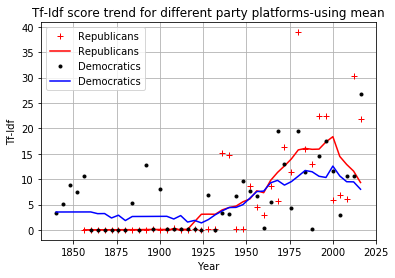

In [23]:
#plt.plot(x,mean_each_doc_democ,'r+')
def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

y = mean_each_doc_democ
y2 = mean_each_doc_rep
ymax = max_each_doc_democ
ymax2 = max_each_doc_rep
ymin = min_each_doc_democ
ymin2 = min_each_doc_rep
ysum = sum_each_doc_democ
ysum2 = sum_each_doc_rep

#mean
#plt.ylim(0,0.1)

plt.plot(x2,y2,'r+',label = 'Republicans')
y2_av = movingaverage(y2, 10) #average every 40 years
plt.plot(x2, y2_av,"r-",label = 'Republicans')

plt.plot(x,y,"k.", label = 'Democratics')
#plt.hlines(max(y), min(x), max(x), colors='k', linestyles='solid')
y_av = movingaverage(y, 10)
plt.plot(x, y_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using mean")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

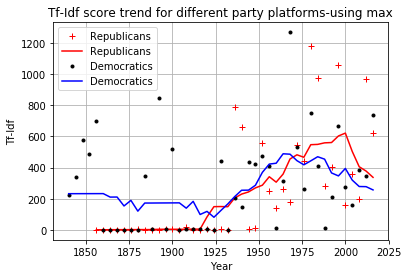

In [24]:
#max
plt.plot(x2,ymax2,'r+',label = 'Republicans')
ymax2_av = movingaverage(ymax2, 10) #average every 40 years
plt.plot(x2, ymax2_av,"r-",label = 'Republicans')

plt.plot(x,ymax,"k.", label = 'Democratics')
ymax_av = movingaverage(ymax, 10)
plt.plot(x, ymax_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using max")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

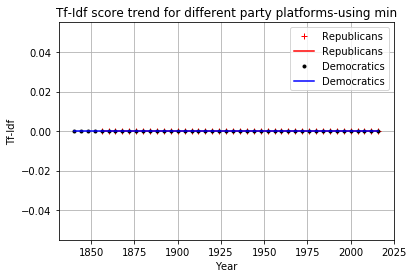

In [25]:
#min
plt.plot(x2,ymin2,'r+',label = 'Republicans')
ymin2_av = movingaverage(ymin2, 10) #average every 40 years
plt.plot(x2, ymin2_av,"r-",label = 'Republicans')

plt.plot(x,ymin,"k.", label = 'Democratics')
ymin_av = movingaverage(ymin, 10)
plt.plot(x, ymin_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using min")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

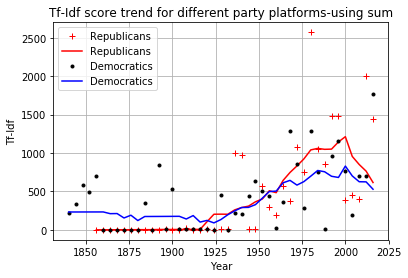

In [26]:
#sum
plt.plot(x2,ysum2,'r+',label = 'Republicans')
ysum2_av = movingaverage(ysum2, 10) #average every 40 years
plt.plot(x2, ysum2_av,"r-",label = 'Republicans')

plt.plot(x,ysum,"k.", label = 'Democratics')
ysum_av = movingaverage(ysum, 10)
plt.plot(x, ysum_av,"b-", label = 'Democratics')

plt.title("Tf-Idf score trend for different party platforms-using sum")
plt.xlabel("Year")
plt.ylabel("Tf-Idf")
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

From the data we can see that the new term induced enlarges the difference of the score value between known frontier literatures and the test literatures. So it means it has successfully reduced the negative impact of the unique word number and importance rank to the result.


For the TFIDF part, as it may not be accurate to directly compare the TFIDF score of same word in different documents (Because the word with different TFIDF score just related to the appearing frequency but it is the comparison in appearing frequency across all words in that document which decide the importance of that word in the document. So a word with different TFIDF score in two documents may have same importance in both documents.), so we time each TFIDF score in one document with a weight which equals to the importance of the word in the document. i.e. if the word A’s TFIDF score is 3rd highest and there’re 50 different words in that document, the weight will be 3/50. So the result will be

(time a word appear in a doc)/(word number of a document )×log (number of doc)/(number of doc that contains that word+1)×(importance of that word)/(number of different word in that topic)

The first term balances different length of documents, the second term balance the words that are common in all documents, the third term balance the number of different words in one document. 
We do similar procedure as above to get the trend of the frontier score change in literatures across different years for democratic and republican party to see the change of popularity.


1. what is tfidf score and why we can use it
   The second method we tried was to use Tf-Idf score to indicate how each document's writing s

2. How to implement it
   For the Tf_Idf part, we built a matrix of Tf-Idf scores of all frontier words with respect to each party platform document. To we reduced the dimension of the features by getting a score of the "frontierness" of each document. To do this, we did average(& summation) value of the Tf-Idf score for all the frontier words in a document. Then by comparing the changing trend of the scores from document in time-period basis, we can get a brief result for the popularity trend of frontier words over time within politicians. We also tried to use the minimum and maximum Tf-Idf score of frontier words in each document to find the best way to process the data. The results are shown below:
   1. chart
   2. plot
The chart indicates that there is not much difference between the frontier literatures and the test literatures. After thinking about the reason, this may because it is the comparison in Tf-Idf score across all unique words in that document which decide the importance of that word in the document, not the score alone. So directly compare Tf-Idf score across different documents may not be accurate. As a result, we introduced another term to take the unique word number and rank into account. The results are shown below:
   1. chart
   2. plot
  From the data we can see that the new term induced enlarges the difference of the score value between known frontier literatures and the test literatures. So it means it has reduced the negative impact of the unique word number and importance rank to the result. The trend changes and it has a more accurate reflect to the trend.
   
   from the trend we can see that the popularity of Frontier words in party platforms has a decending trend before 1930s and rising after that until around 2000. This may because the frontier words were mainly used by farmers and cowboys in the west and not by politicians in formal documents. As time passes, some of the frontier words may be used gradually more often in formal situations and politicians nowadays also tend to use more less formal words to get support from people all different backgrounds.
